In [2]:
import sys
import matplotlib.animation
import numpy
import mozaik
from mozaik.controller import run_workflow, setup_logging
from mozaik.storage.datastore import Hdf5DataStore,PickledDataStore
from parameters import ParameterSet
from mozaik.visualization.plotting import *
from mozaik.analysis.technical import NeuronAnnotationsToPerNeuronValues
from mozaik.tools.mozaik_parametrized import colapse, colapse_to_dictionary, MozaikParametrized
from mozaik.analysis.analysis import *
from mozaik.analysis.vision import *
from mozaik.storage.queries import *
from mozaik.visualization.helper_functions import *

%matplotlib inline

setup_logging()

data_store = PickledDataStore(load=True,parameters=ParameterSet({'root_directory':'/home/antolikjan/projects/mozaikluca/mozaik-tools/GenerateMLDataFromLSV1M/20250128-104151[param.defaults]CombinationParamSearch{trial:[1],input_space.update_interval:[16],sheets.retina_lgn.params.receptive_field.temporal_resolution:[16]}/SelfSustainedPushPull_ParameterSearch_____update_interval:16_temporal_resolution:16_trial:1','store_stimuli': None}),replace=True)
  
  


In [ ]:
dsv = param_filter_query(data_store,sheet_name="V1_Exc_L2/3")
stim = dsv.get_sensory_stimulus()
stim_ids = dsv.get_stimuli()
stimuli = numpy.load('/home/antolikjan//projects/mozaiknew/DATASETS/LSV1M_model_for_Katrin/imgs_grayscale.npy')

In [52]:
print(stim_ids[2])
print(stim[0])

{"module_path" :"mozaik.stimuli","direct_stimulation_name":None, "direct_stimulation_parameters":None, "duration":300, "frame_duration":300, "name":'EndOfSimulationBlank', "trial":0}
[array([[ 9.21806959,  9.21806959, 15.50401009, ..., 26.97359354,
        48.33394425, 48.33394425],
       [ 9.21806959,  9.21806959, 15.50401009, ..., 26.97359354,
        48.33394425, 48.33394425],
       [35.91542894, 35.91542894, 30.39250473, ..., 57.28047153,
        51.59655734, 51.59655734],
       ...,
       [41.14159201, 41.14159201, 45.32615867, ..., 47.40641907,
        51.03646467, 51.03646467],
       [64.53528437, 64.53528437, 64.76342683, ..., 74.7125493 ,
        72.07483542, 72.07483542],
       [64.53528437, 64.53528437, 64.76342683, ..., 74.7125493 ,
        72.07483542, 72.07483542]]), array([[50.35035634, 50.35035634, 33.41406269, ..., 71.52902311,
        53.56519893, 53.56519893],
       [50.35035634, 50.35035634, 33.41406269, ..., 71.52902311,
        53.56519893, 53.56519893],
  

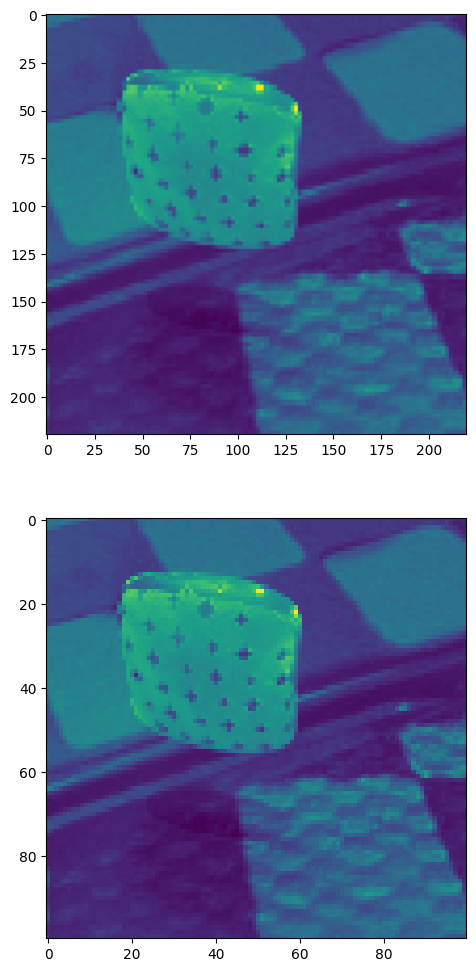

In [50]:
pylab.figure(figsize=(6,12))
pylab.subplot(2,1,1)
pylab.imshow(stim[1][0])
pylab.subplot(2,1,2)
pylab.imshow(stimuli[4560])

In [7]:
dsv = param_filter_query(data_store,sheet_name="V1_Exc_L4")
print(len(dsv.get_segments()))

304


In [ ]:
dsvs = queries.partition_by_stimulus_paramter_query(dsv,["trial"])
print(len(dsvs))
res={}
i = 0
for dsv in dsvs:
        # lets get rid of trial from the stimulus ID to use for the new ADS
        stim = dsv.get_stimuli()[0]
        stim = MozaikParametrized.idd(stim)
        stim.trial = None
        stim = str(stim)

        if not stim in res.keys():
               res[stim]={}
        print(len(dsv.get_segments()))
        for seg in dsv.get_segments():

            print(i)
            i = i +1        
            
            sheet_name = seg.annotations['sheet_name']

            if sheet_name not in res[stim].keys():
               res[stim][sheet_name]=[] 

            res[stim][sheet_name].append([s.magnitude for s in seg.spiketrains]) 

for k in res.keys():
    for kk in res[k].keys():
        res[k][kk] = numpy.array(res[k][kk])

In [38]:
first=next(iter(res.keys()))
a = res[first]['V1_Exc_L4'][0]

r = [numpy.histogram(sp, bins=180, range=(0,1800))[0] for sp in a]


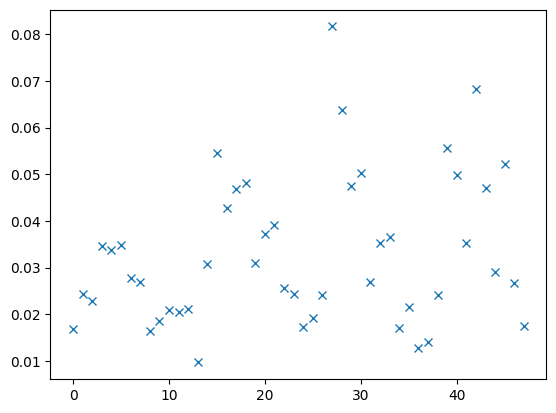

In [49]:
pylab.plot(numpy.mean(r,axis=0)[:48],'x')

In [3]:
conn =  numpy.array(data_store.get_analysis_result(identifier='Connections',proj_name='V1AffConnectionOn')[0].weights)
sheet_idx = data_store.get_sheet_indexes('V1_Exc_L4',idd)
post_syn_idx = numpy.nonzero(conn[:,1].flatten()==sheet_idx)[0]
pre_syn_idx = conn[post_syn_idx,0].flatten().astype(int)


NameError: name 'idd' is not defined

In [15]:
numpy.max(numpy.array(conn),axis=0)

array([7.1990e+03, 3.7499e+04, 9.6000e-03])

In [5]:
numpy.shape(conn)

(2102883, 3)

In [12]:
print([conn[3][1] for i in range(0,100)])

[553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0]


In [17]:
print(data_store.get_analysis_result(identifier='Connections'))

(Connections
   "analysis_algorithm":'connection storage'
   "identifier":'Connections'
   "name":'Connections'
   "neuron":None
   "proj_name":'V1AffConnectionOn'
   "sheet_name":None
   "source_name":'X_ON'
   "stimulus_id":None
   "target_name":'V1_Exc_L4'
, Connections
   "analysis_algorithm":'connection storage'
   "identifier":'Connections'
   "name":'Connections'
   "neuron":None
   "proj_name":'V1AffConnectionOff'
   "sheet_name":None
   "source_name":'X_OFF'
   "stimulus_id":None
   "target_name":'V1_Exc_L4'
, Connections
   "analysis_algorithm":'connection storage'
   "identifier":'Connections'
   "name":'Connections'
   "neuron":None
   "proj_name":'V1AffInhConnectionOn'
   "sheet_name":None
   "source_name":'X_ON'
   "stimulus_id":None
   "target_name":'V1_Inh_L4'
, Connections
   "analysis_algorithm":'connection storage'
   "identifier":'Connections'
   "name":'Connections'
   "neuron":None
   "proj_name":'V1AffInhConnectionOff'
   "sheet_name":None
   "source_name":'X_OFF

In [22]:
conns = {}
for ads in data_store.get_analysis_result(identifier='Connections'):
    conns[ads.proj_name] = ads.weights

import pickle

f = open('connections.pickle','wb')
pickle.dump(conns,f)
f.close()